In [127]:
#import urllib.request
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [146]:
def captch_ex(file_name,opciont=1):
    img = cv2.imread(file_name)
    img = cv2.resize(img,(700,600))

    img_final = cv2.imread(file_name)
    img_final = cv2.resize(img_final,(700,600))
    
    img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img2gray,interpolation="bicubic")
#     if opciont==1:
#         ret, mask = cv2.threshold(img2gray, 200, 255, cv2.THRESH_BINARY)
#     if opciont==2:
#         ret, mask = cv2.threshold(img2gray, 140, 255, cv2.THRESH_BINARY)

    edges = cv2.Canny(img2gray,160,220)
    plt.imshow(edges,interpolation="bicubic")
    
    #image_final = cv2.bitwise_and(img2gray, img2gray, mask=mask)
    
    ret, new_img = cv2.threshold(edges, 180, 255, cv2.THRESH_BINARY)  # for black text , cv.THRESH_BINARY_INV
    '''
            line  8 to 12  : Remove noisy portion 
    '''
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,
                                                         3))  # to manipulate the orientation of dilution , large x means horizonatally dilating  more, large y means vertically dilating more
    dilated = cv2.dilate(new_img, kernel, iterations=9)  # dilate , more the iteration more the dilation
    #plt.imshow(image_final,interpolation="bicubic")

    # for cv2.x.x

    _, contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  # findContours returns 3 variables for getting contours

    # for cv3.x.x comment above line and uncomment line below

    #image, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

    i=0;    

    for contour in contours:
        # get rectangle bounding contour
        [x, y, w, h] = cv2.boundingRect(contour)

        # Don't plot small false positives that aren't text
        if w < 100 and h < 60:
            continue
            
        if w > 350 or h > 120:
            continue
            
        if not ((w>2*h) and (w<5*h)):
            continue

        # draw rectangle around contour on original image
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0,0), 4)
        #plt.imshow(img[y:(y+h),x:(x+w),:],interpolation="bicubic")
        if opciont==1:
            file_name_pĺaca = file_name+"_placa_op1_"+str(i)+".jpg"
        if opciont==2:
            file_name_pĺaca = file_name+"_placa_op2_"+str(i)+".jpg"
        cv2.imwrite(file_name_pĺaca,img[y:(y+h),x:(x+w),:])
        print(np.shape(img))
        '''
        #you can crop image and send to OCR  , false detected will return no text :)
        cropped = img_final[y :y +  h , x : x + w]

        s = file_name + '/crop_' + str(index) + '.jpg' 
        cv2.imwrite(s , cropped)
        index = index + 1

        '''
        i=i+1
    # write original image with added contours to disk
    plt.imshow(img,interpolation="bicubic")
    #plt.imshow(img[x:(x+w),y:(y+h)],interpolation="bicubic")




In [130]:
!pwd

/home/adrianrdzv/MEGAsync/prdc/PROYECTO_IMAGENES/CODIGO


In [131]:
os.getcwd()

'/home/adrianrdzv/MEGAsync/prdc/PROYECTO_IMAGENES/CODIGO'

In [150]:

#os.chdir(path)
path=os.getcwd()+"/../FUENTES/day_very_close_view/"
file_name = path+"HPIM0627.JPG"


In [134]:
file_name

'/home/adrianrdzv/MEGAsync/prdc/PROYECTO_IMAGENES/CODIGO/../FUENTES/day_very_close_view/45.JPG'

(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)


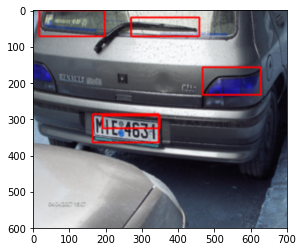

In [151]:
captch_ex(file_name,opciont=1)

In [25]:
os.listdir(path)

['HPIM1193.JPG_placa_op2_0.jpg',
 'HPIM0794.JPG_placa_op2_0.jpg',
 'HPIM1184.JPG',
 'HPIM1014.JPG_placa_op2_1.jpg',
 'HPIM0794.JPG',
 'PHTO0065.JPG',
 '67.JPG_placa_op2_0.jpg',
 'HPIM0627.JPG_placa_op2_0.jpg',
 'HPIM1175.JPG_placa_op2_1.jpg',
 '37.JPG_placa_op2_0.jpg',
 'HPIM1051.JPG_placa_op2_0.jpg',
 'HPIM1210.JPG_placa_op2_0.jpg',
 'HPIM1208.JPG',
 'HPIM1215.JPG',
 'HPIM1156.JPG_placa_op2_0.jpg',
 'HPIM1014.JPG',
 'HPIM1254.JPG',
 'HPIM0686.JPG',
 'PHTO0065.JPG_placa_op2_0.jpg',
 'HPIM1155.JPG',
 'HPIM1163.JPG_placa_op2_1.jpg',
 'HPIM0932.JPG_placa_op2_0.jpg',
 'HPIM0785.JPG',
 'HPIM1165.JPG',
 'HPIM1081.JPG',
 'HPIM1254.JPG_placa_op2_1.jpg',
 'HPIM1236.JPG_placa_op2_2.jpg',
 'HPIM0675.JPG',
 'HPIM1118.JPG_placa_op2_0.jpg',
 'HPIM1118.JPG',
 'HPIM0711.JPG',
 'HPIM1247.JPG',
 'HPIM1081.JPG_placa_op2_0.jpg',
 'HPIM1158.JPG_placa_op2_1.jpg',
 'HPIM1303.JPG',
 'HPIM0666.JPG',
 '51.JPG',
 'HPIM1247.JPG_placa_op2_0.jpg',
 'HPIM0675.JPG_placa_op2_0.jpg',
 'HPIM0711.JPG_placa_op2_0.jpg',
 '

(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 700, 3)
(600, 

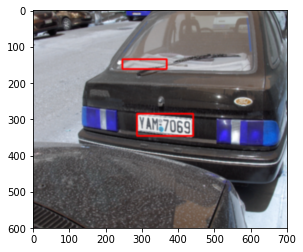

In [26]:
for file_name in os.listdir(path):
    captch_ex(path+file_name,opciont=2)

(600, 700, 3)


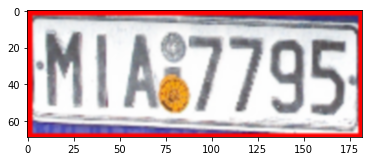